In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
df = pd.read_csv('prabowo_label.csv')
df = pd.DataFrame(df[[ 'detokens', 'label']])
df

detokens    label
0     kali ganti lanjut presiden jokowi jend purn wi...  negatif
1     respons kornas pdip gerindra temu gibran rakab...  negatif
2        survei periodik litbang kompas wawancara tatap  negatif
3     partai besut unggul golkar peringkat angka pil...  positif
4     respons kornas pdip gerindra temu gibran rakab...  negatif
...                                                 ...      ...
3965  simpul menhan politik aku kancah dunia interna...  negatif
3966  simpul menhan politik aku kancah dunia interna...  negatif
3967                  bangsa indonesia sadar cinta ragu  positif
3968  teliti badan riset inovasi nasional brin dewi ...  negatif
3969  teliti badan riset inovasi nasional brin dewi ...  negatif

[3970 rows x 2 columns]

In [3]:
df_negative = df[ (df['label']=='negatif')]
df_positive = df[ (df['label']=='positif')]
#covert to list
negative_list = df_negative['detokens'].tolist()
positive_list = df_positive['detokens'].tolist()

filtered_negative = ("").join(str(negative_list))
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list))
filtered_positive = filtered_positive.lower()

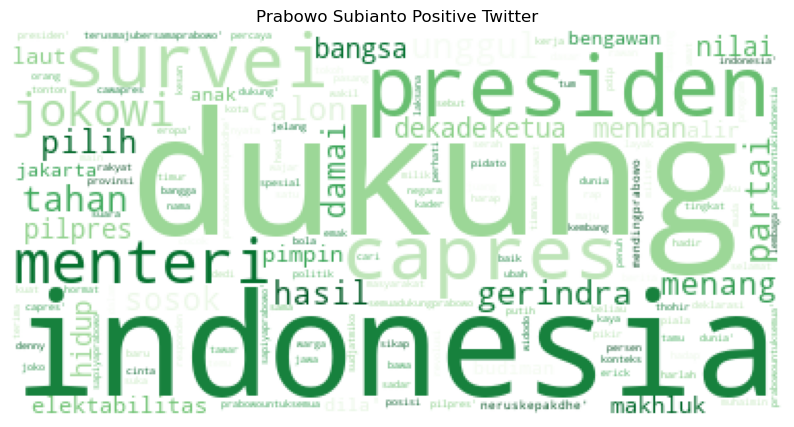

In [4]:
wordcloud = WordCloud(background_color="White",colormap='Greens' , max_words=200, contour_color="steelblue", contour_width=8, collocations=False).generate(filtered_positive)
plt.figure(1, figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0,y=0)
plt.title("Prabowo Subianto Positive Twitter")
plt.show()

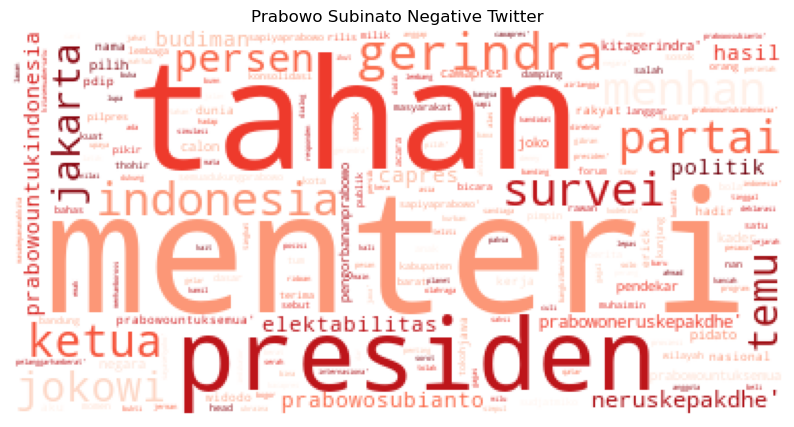

In [5]:
wordcloud = WordCloud(background_color="White", colormap='Reds' ,max_words=200, contour_color="steelblue", contour_width=8, collocations=False).generate(filtered_negative)
plt.figure(1, figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0,y=0)
plt.title("Prabowo Subinato Negative Twitter")
plt.show()

# topik

In [6]:
df = pd.read_csv('prabowo_prepro.csv', dtype=str)
df = pd.DataFrame(df[['stemming']])
df

stemming
0     ['kali', 'ganti', 'lanjut', 'presiden', 'jokow...
1     ['respons', 'kornas', 'pdip', 'gerindra', 'tem...
2     ['survei', 'periodik', 'litbang', 'kompas', 'w...
3     ['partai', 'besut', 'unggul', 'golkar', 'perin...
4     ['respons', 'kornas', 'pdip', 'gerindra', 'tem...
...                                                 ...
3965  ['simpul', 'menhan', 'politik', 'aku', 'kancah...
3966  ['simpul', 'menhan', 'politik', 'aku', 'kancah...
3967  ['bangsa', 'indonesia', 'sadar', 'cinta', 'ragu']
3968  ['teliti', 'badan', 'riset', 'inovasi', 'nasio...
3969  ['teliti', 'badan', 'riset', 'inovasi', 'nasio...

[3970 rows x 1 columns]

In [7]:
vectorizer = TfidfVectorizer(min_df=2, max_df=0.95)
data = vectorizer.fit_transform(df['stemming'])
feature_names = vectorizer.get_feature_names_out()

In [8]:
n_topics = 10
n_top_words = 10

nmf = NMF(n_components=n_topics).fit(data)
W = nmf.components_
H = nmf.transform(data)

In [9]:
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topik {topic_idx} : {' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words -1 : -1]])}")

Topik 0 : presiden calon pilih jokowi joko widodo pilpres dukung wakil muhaimin
Topik 1 : pendekar pengorbananprabowo kitagerindra prabowosubianto kodekita masadepananakkita pesanprabowo prabowountuksemua youtube prabowomenhan
Topik 2 : hidup bengawan makhluk alir dila laut sosok rakyat pil baik
Topik 3 : survei hasil elektabilitas head unggul baru capres rilis lembaga simulasi
Topik 4 : menteri tahan jakarta menhan kunjung joko widodo momen hadir bandung
Topik 5 : gerindra partai ketua kader jakarta sapiyaprabowo ahmad konsolidasi pdip pesan
Topik 6 : prabowountukindonesia neruskepakdhe jawa main kitasemuabersatu kerja emak temu jerman provinsi
Topik 7 : prabowountuksemua indonesia menhan prabowoneruskepakdhe dunia negara aku bangsa politik budiman
Topik 8 : persen erick thohir bumn kamil ridwan mahfud sandiaga dukung pilih
Topik 9 : capres dekade mendingprabowo terusmajubersamaprabowo damai allinprabowo capai bawa juang bantu
